# *WAVE* *PACKET* *EVOLUTION*

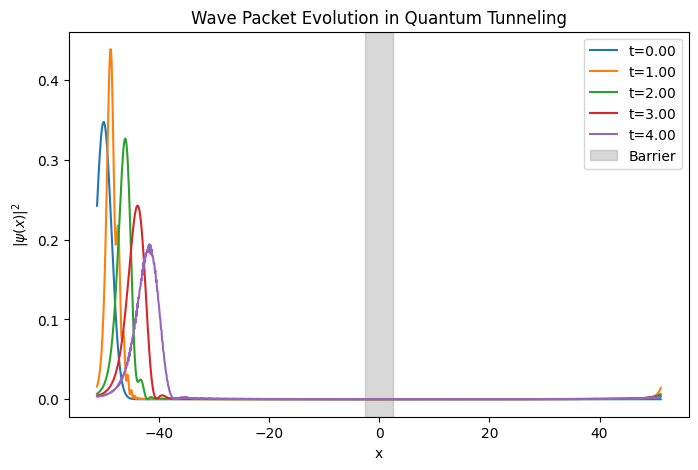

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Parameters
Nx = 1024
dx = 0.1
x = np.arange(-Nx//2, Nx//2) * dx
dt = 0.005
Nt = 800
m = 1.0
hbar = 1.0

# Potential barrier parameters
a = 5.0
V0 = 1.0
V = np.zeros(Nx)
V[(x > -a/2) & (x < a/2)] = V0

# Initial Gaussian wave packet
x0 = -50.0
p0 = 2.0
psi = np.exp(-(x - x0)**2 / (2 * 2**2)) * np.exp(1j * p0 * x / hbar)
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)

# Fourier space
k = 2 * np.pi * fftfreq(Nx, d=dx)

# Precompute phase factors
expV = np.exp(-1j * V * dt / (2 * hbar))
expK = np.exp(-1j * (hbar * k)**2 / (2 * m) * dt / hbar)

# Store snapshots for plotting
snapshots = [psi.copy()]

# Time evolution
for t in range(Nt):
    psi = expV * psi
    psi = ifft(expK * fft(psi))
    psi = expV * psi
    if t in [100, 300, 500, 700]:
        snapshots.append(psi.copy())
# Plot wave packet evolution
plt.figure(figsize=(8, 5))
for i, snap in enumerate(snapshots):
    plt.plot(x, np.abs(snap)**2, label=f"t={i*200*dt:.2f}")
plt.axvspan(-a/2, a/2, color='gray', alpha=0.3, label="Barrier")
plt.xlabel("x")
plt.ylabel(r"$|\psi(x)|^2$")
plt.legend()
plt.title("Wave Packet Evolution in Quantum Tunneling")
plt.show()

# TRANSMISSION VS BARRIER

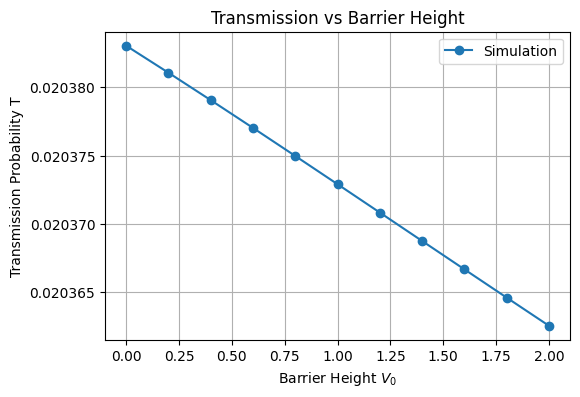

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Parameters
Nx =1024
dx = 0.1
x= np.arange(-Nx//2, Nx//2) * dx
dt = 0.005
Nt = 800
m= 1.0
hbar = 1.0

# Potential barrier parameters
a =5.0
V0_values = np.linspace(0, 2, 11)  # Array of barrier heights to test
T_values = []  # List to store transmission probabilities

for V0 in V0_values:
    V =np.zeros(Nx)
    V[(x > -a/2) & (x < a/2)] = V0

    # Initial Gaussian wave packet
    x0 = -50.0
    p0 =2.0
    psi = np.exp(-(x - x0)**2 / (2 * 2**2)) * np.exp(1j * p0 * x / hbar)
    psi /=np.sqrt(np.sum(np.abs(psi)**2) * dx)

    # Fourier space
    k = 2 * np.pi * fftfreq(Nx, d=dx)

    # Precompute phase factors
    expV = np.exp(-1j * V * dt / (2 * hbar))
    expK = np.exp(-1j * (hbar * k)**2 / (2 * m) * dt / hbar)

    # Time evolution
    for t in range(Nt ):
        psi = expV * psi
        psi=ifft(expK * fft(psi))
        psi = expV * psi

    # Calculate transmission probability
    T = np.sum(np.abs(psi[Nx//2:])**2) * dx
    T_values.append(T)

# Plot transmission vs barrier height
plt.figure(figsize=(6, 4))
plt.plot(V0_values, T_values, 'o-', label="Simulation")
plt.xlabel("Barrier Height $V_0$")
plt.ylabel("Transmission Probability T" )
plt.title("Transmission vs Barrier Height")
plt.grid(True)
plt.legend()
plt.show()

TRANSMISSION Vs ENERGY

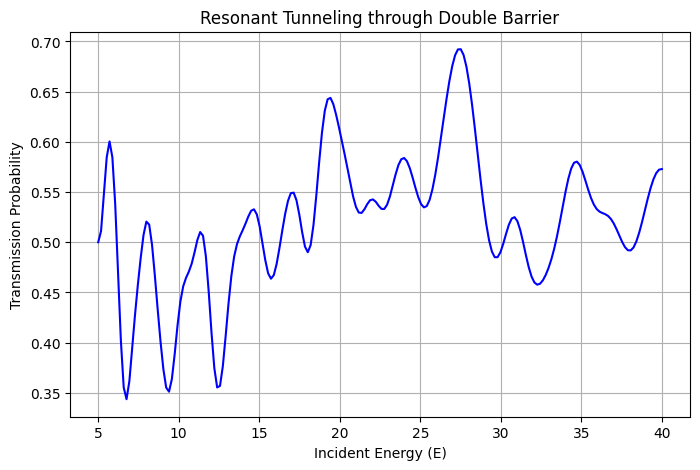

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0
m = 1.0

# Spatial grid
L = 200.0
N = 2048
dx = L / N
x = np.linspace(-L/2, L/2, N)

# Time step
dt = 0.05

# Double barrier parameters
V0 = 50.0       # height
a = 1.0         # each barrier width
d = 4.0         # distance between barriers (center to center)
V = np.zeros(N)
V[np.abs(x + d/2) < a/2] = V0
V[np.abs(x - d/2) < a/2] = V0

# Split-step Fourier method
k_vals = 2 * np.pi * np.fft.fftfreq(N, d=dx)
T_vals = []

def evolve(psi, steps):
    for _ in range(steps):
        psi = np.exp(-1j * V * dt / (2*hbar)) * psi
        psi_k = np.fft.fft(psi)
        psi_k *= np.exp(-1j * hbar * k_vals**2 * dt / (2*m))
        psi = np.fft.ifft(psi_k)
        psi *= np.exp(-1j * V * dt / (2*hbar))
    return psi

# Scan over energies to compute transmission probability
energies = np.linspace(5, 40, 200)  # incident energies
for E in energies:
    k0 = np.sqrt(2*m*E) / hbar
    sigma0 = 5.0
    x0 = -60.0
    psi0 = (1/(2*np.pi*sigma0**2))**0.25 * np.exp(-(x-x0)**2/(4*sigma0**2)) * np.exp(1j*k0*x)
    psi = evolve(psi0, 4000)
    mask_trans = x > (d/2 + a/2)
    T = np.sum(np.abs(psi[mask_trans])**2) * dx
    T_vals.append(T)

# Plot transmission vs. energy
plt.figure(figsize=(8,5))
plt.plot(energies, T_vals, 'b-')
plt.xlabel("Incident Energy (E)")
plt.ylabel("Transmission Probability")
plt.title("Resonant Tunneling through Double Barrier")
plt.grid(True)
plt.savefig("double_barrier_resonance.png", dpi=300, bbox_inches='tight')
plt.show()


================= **THANK YOU** ==================